In [1]:
#Importing needed libraries for project #3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading original data into dataframe
df = pd.read_csv(r'C:\Users\pumci\Downloads\DOHMH_New_York_City_Restaurant_Inspection_Results.csv') 
#Printing first three observations
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50106407,NaN,Queens,12615,LIBERTY AVE,11419.0,7188447300,NaN,01/01/1900,NaN,...,07/15/2021,NaN,40.688685,-73.817858,410.0,28.0,15802.0,4203949.0,4.095630e+09,QN55
1,50018473,PRESTIGE,Queens,9133,63RD DR,11374.0,7182752209,Jewish/Kosher,07/28/2016,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Re-inspection,40.726943,-73.864400,406.0,29.0,69500.0,4072814.0,4.031030e+09,QN18
2,50072808,CANELA COLOMBIAN RESTAURANT & BAKERY,Brooklyn,4601,5 AVENUE,11220.0,7185763491,Spanish,02/27/2018,Violations were cited in the following area(s).,...,07/15/2021,Pre-permit (Operational) / Re-inspection,40.647251,-74.008068,307.0,38.0,9600.0,3011895.0,3.007570e+09,BK34


In [3]:
#Printing last three observations
df.tail(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
414966,50001249,"TIGIN IRISH PUB, PEETS COFFEE&TEA/CANAL STREET...",Queens,NKA,JFK INTERNATIONAL AIRPORT,11430.0,7187514765,American,08/17/2016,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Re-inspection,40.648313,-73.788281,483.0,28.0,71600.0,4000000.0,4.142600e+09,QN98
414967,50037651,SABOR TROPICAL,Manhattan,143,SHERMAN AVENUE,10034.0,2123045144,Latin American,04/23/2018,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Initial Inspection,40.864534,-73.923368,112.0,10.0,29100.0,1064764.0,1.022210e+09,MN01
414968,50060390,CHOP'T,Manhattan,350,5 AVENUE,10118.0,2129679380,Salads,06/15/2018,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Initial Inspection,40.748269,-73.984690,105.0,4.0,7600.0,1015862.0,1.008350e+09,MN17


In [4]:
#Checking dataset's size
df.shape

(414969, 26)

In [5]:
#Priniting dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414969 entries, 0 to 414968
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  414969 non-null  int64  
 1   DBA                    413948 non-null  object 
 2   BORO                   414969 non-null  object 
 3   BUILDING               414206 non-null  object 
 4   STREET                 414917 non-null  object 
 5   ZIPCODE                408444 non-null  float64
 6   PHONE                  414929 non-null  object 
 7   CUISINE DESCRIPTION    410000 non-null  object 
 8   INSPECTION DATE        414969 non-null  object 
 9   ACTION                 410001 non-null  object 
 10  VIOLATION CODE         404703 non-null  object 
 11  VIOLATION DESCRIPTION  407454 non-null  object 
 12  CRITICAL FLAG          414969 non-null  object 
 13  SCORE                  394733 non-null  float64
 14  GRADE                  211918 non-nu

In [6]:
#Getting coulmns in the dataset
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [7]:
#Finding out # of inspections per borough
df.BORO.value_counts()

Manhattan        162838
Brooklyn         105672
Queens            94182
Bronx             38108
Staten Island     14022
0                   147
Name: BORO, dtype: int64

In [10]:
#Replacing '0' to Not a Number (NaN)
df1 = df.replace('0', np.nan)
#Dropping rows in columns BORO with NaN
df2 = df1.dropna(subset = ["BORO"])
df2.BORO.value_counts()

Manhattan        162838
Brooklyn         105672
Queens            94182
Bronx             38108
Staten Island     14022
Name: BORO, dtype: int64

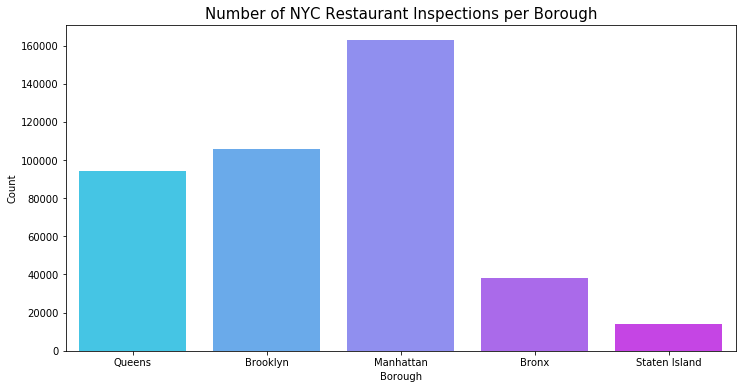

In [12]:
#Bar chart of inspections per borough
fig = plt.figure(figsize=(12,6))
sns.countplot(x='BORO', data=df2, palette='cool')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Number of NYC Restaurant Inspections per Borough', fontsize=15)
plt.show()

In [13]:
#Replacing Z -> Grade Pending
df2['GRADE'] = df2['GRADE'].replace(to_replace = 'Z', value='Grade Pending')

C:\Users\pumci\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
#Replacing P -> Grade Pending
df2['GRADE'] = df2['GRADE'].replace(to_replace = 'P', value='Grade Pending')

C:\Users\pumci\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
#Replacing N -> Not Yet Graded
df2['GRADE'] = df2['GRADE'].replace(to_replace = 'N', value='Not Yet Graded')

C:\Users\pumci\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
#Replacing G -> Grade Pending
df2['GRADE'] = df2['GRADE'].replace(to_replace = 'G', value='Grade Pending')

C:\Users\pumci\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
boro_grade = pd.crosstab(df2.BORO, df2.GRADE)
boro_grade

GRADE,A,B,C,Grade Pending,Not Yet Graded
BORO,,,,,
Bronx,15353,2936,1098,334,131
Brooklyn,42560,6810,2419,1031,715
Manhattan,66611,9920,4003,1170,903
Queens,38696,6011,2383,774,610
Staten Island,6010,893,274,90,110


Text(0, 0.5, 'Borough')

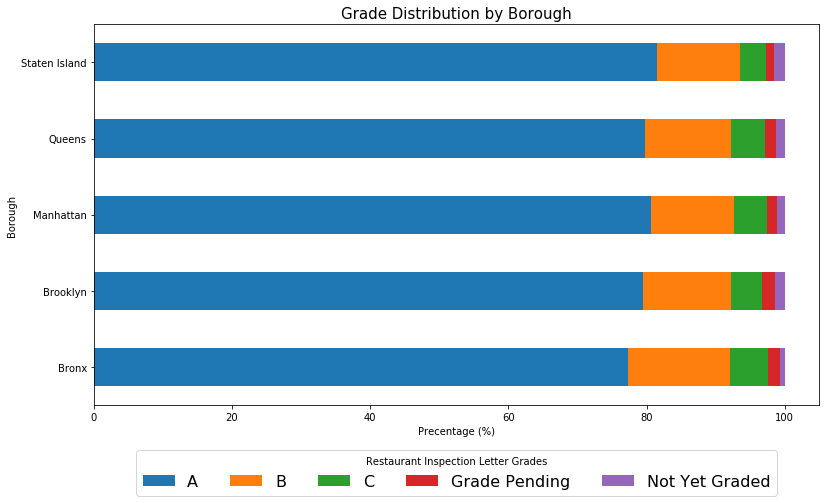

In [18]:
#Plot of grade by borough (%)
stacked_data = boro_grade.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", figsize=(13,7), stacked=True).legend(bbox_to_anchor=(0.5, -0.26),
              loc='lower center', ncol=30, fontsize=16, title="Restaurant Inspection Letter Grades")
plt.title('Grade Distribution by Borough', fontsize=15)
plt.xlabel("Precentage (%)")
plt.ylabel("Borough")

In [19]:
df3 = df2.query('GRADE== "A"')
df4 = df3.groupby('CRITICAL FLAG')
df4

Text(0, 0.5, 'Count')

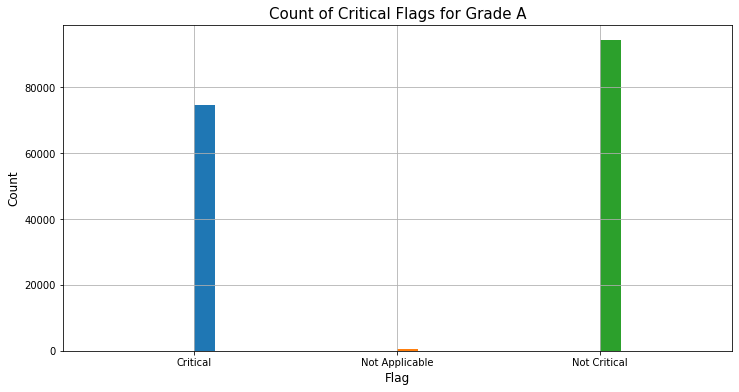

In [41]:
# Graphical representation of the critical flag
df4['CRITICAL FLAG'].hist(figsize=(12,6))
plt.title('Count of Critical Flags for Grade A', fontsize = 15)
plt.xlabel('Flag', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

In [20]:
df5 = df4.get_group('Critical')
df5.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
2,50072808,CANELA COLOMBIAN RESTAURANT & BAKERY,Brooklyn,4601,5 AVENUE,11220.0,7185763491,Spanish,02/27/2018,Violations were cited in the following area(s).,...,07/15/2021,Pre-permit (Operational) / Re-inspection,40.647251,-74.008068,307.0,38.0,9600.0,3011895.0,3.007570e+09,BK34
3,41354409,CAFE PETISCO,Manhattan,189,EAST BROADWAY,10002.0,2123870366,Mediterranean,04/11/2018,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Initial Inspection,40.714163,-73.988796,103.0,1.0,600.0,1003616.0,1.002840e+09,MN28
4,41271290,SABOR LATINO SEAFOOD RESTAURANT,Bronx,2161,STARLING AVENUE,10462.0,7188220899,Seafood,04/30/2019,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Re-inspection,40.836271,-73.853071,209.0,18.0,22200.0,2041227.0,2.039480e+09,BX46


In [51]:
violation_desc=df5.groupby(['VIOLATION DESCRIPTION','VIOLATION CODE']).size()
df7 = pd.DataFrame({'Count':violation_desc.values}, index=violation_desc.index).sort_values(by = 'Count', ascending=False)
df7.head(7)

,,Count
VIOLATION DESCRIPTION,VIOLATION CODE,
"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",06D,13252
"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",06C,12121
Evidence of mice or live mice present in facility's food and/or non-food areas.,04L,8497
Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,02G,7183
Hot food item not held at or above 140º F.,02B,6379
"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facility’s food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",04N,6154
"Sanitized equipment or utensil, including in-use food dispensing utensil, improperly used or stored.",06E,3215


In [52]:
df5a = df4.get_group('Not Critical')
df5a.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
1,50018473,PRESTIGE,Queens,9133,63RD DR,11374.0,7182752209,Jewish/Kosher,07/28/2016,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Re-inspection,40.726943,-73.864400,406.0,29.0,69500.0,4072814.0,4.031030e+09,QN18
5,50094948,HAINAN,Queens,4125,162ND ST,11358.0,9175637223,Korean,08/21/2019,Violations were cited in the following area(s).,...,07/15/2021,Pre-permit (Operational) / Re-inspection,40.761036,-73.803884,407.0,20.0,117100.0,4120481.0,4.053360e+09,QN51
7,50011745,SAUCE N CHEESE,Brooklyn,509,ALBANY AVENUE,11203.0,3474251450,Pizza,11/02/2017,Violations were cited in the following area(s).,...,07/15/2021,Cycle Inspection / Re-inspection,40.662593,-73.939983,309.0,41.0,87401.0,3038458.0,3.014280e+09,BK60


In [53]:
violation_desc=df5a.groupby(['VIOLATION DESCRIPTION','VIOLATION CODE']).size()
df7 = pd.DataFrame({'Count':violation_desc.values}, index=violation_desc.index).sort_values(by = 'Count', ascending=False)
df7.head(7)

,,Count
VIOLATION DESCRIPTION,VIOLATION CODE,
"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",10F,47235
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,08A,13776
Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,10B,12912
Food contact surface not properly maintained.,09C,4096
Proper sanitization not provided for utensil ware washing operation.,10H,3246
Pesticide use not in accordance with label or applicable laws. Prohibited chemical used/stored. Open bait station used.,08C,2689
"Single service item reused, improperly stored, dispensed; not used when required.",10I,2525
